In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
#from geobr import read_state
import matplotlib.colors as mcolors
import matplotlib.ticker as ticker

#format float numbers to not use scientific notation
pd.options.display.float_format = '{0:.2f}'.format


In [2]:
#import data from .csv to pandas dataframe
df_data = pd.read_csv(r'C:\Users\Mariano\Documents\aprendizaje-data-science\repositorio-brazilian-electric-matrix\Brazilian-electric-matrix\data\raw\siga-empreendimentos-geracao.csv', sep = ';', encoding = 'ISO-8859-1')

In [21]:
# define a filtering function
# def apply_filters_to_df(
#     df,
#     status=None,
#     states=None,
#     fuel_type=None,
#     fuel_origin=None,
#     generator_type=None,
#     fuel_type_name=None,
# ):
"""
Apply the users filters to the dataframe for later visualizations.

df: dataframe to be filtered.
status(str or list of str, optional): Operative status of the power plant (Operative, Projected or In construction).
state(str or list of str, optional): state of Brazil where is located the power plant.
fuel_type(str or list of str, optional): specific fuel used in the power plant.
fuel_origin(str or list of str, optional): general origin of the fuel used in the power plant, a more general clasification.
generator_type(str or list of str, optional): type of electric generator used to generate electricity based in the fuel.

return a filtered df
"""
status = ['Operação']
fuel_origin = []
fuel_type = ['Potencial hidráulico']
fuel_type_name = []
generator_type = ['UHE']
states = ['SP']
# define the filtered df
df_filtered = df_data.copy()

# define the conditions to filter
if status:
    df_filtered = df_filtered[df_filtered['DscFaseUsina'].isin(status)]
if states:
    df_filtered = df_filtered[df_filtered['SigUFPrincipal'].isin(states)]
if fuel_origin:
    df_filtered = df_filtered[df_filtered['DscOrigemCombustivel'].isin(fuel_origin)]
if fuel_type:
    df_filtered = df_filtered[df_filtered['DscFonteCombustivel'].isin(fuel_type)]
if fuel_type_name:
    df_filtered = df_filtered[df_filtered['NomFonteCombustivel'].isin(fuel_type_name)]
if generator_type:
    df_filtered = df_filtered[df_filtered['SigTipoGeracao'].isin(generator_type)]
print(df_filtered)
# return the filtered dataframe
#return df_filtered

    DatGeracaoConjuntoDados                           NomEmpreendimento  \
12               2024-02-01                                     Alecrim   
47               2024-02-01               Bariri (Álvaro de Souza Lima)   
48               2024-02-01                                       Barra   
49               2024-02-01                                Barra Bonita   
84               2024-02-01                                     Caconde   
98               2024-02-01                                    Canoas I   
100              2024-02-01   Capivara (Escola de Engenharia Mackenzie)   
119              2024-02-01                                   Chavantes   
147              2024-02-01  Estreito (Luiz Carlos Barreto de Carvalho)   
149              2024-02-01                           Euclides da Cunha   
164              2024-02-01                                      França   
167              2024-02-01                                      Fumaça   
188              2024-02-

In [12]:
#see some information about the dataframe
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25909 entries, 0 to 25908
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   DatGeracaoConjuntoDados       25909 non-null  object
 1   NomEmpreendimento             25909 non-null  object
 2   IdeNucleoCEG                  25909 non-null  int64 
 3   CodCEG                        25909 non-null  object
 4   SigUFPrincipal                25909 non-null  object
 5   SigTipoGeracao                25909 non-null  object
 6   DscFaseUsina                  25909 non-null  object
 7   DscOrigemCombustivel          25909 non-null  object
 8   DscFonteCombustivel           25909 non-null  object
 9   DscTipoOutorga                25909 non-null  object
 10  NomFonteCombustivel           25909 non-null  object
 11  DatEntradaOperacao            25909 non-null  object
 12  MdaPotenciaOutorgadaKw        25909 non-null  object
 13  MdaPotenciaFisca

In [3]:
#count null values for each column
df_data.isnull().sum()

DatGeracaoConjuntoDados             0
NomEmpreendimento                   0
IdeNucleoCEG                        0
CodCEG                              0
SigUFPrincipal                      0
SigTipoGeracao                      0
DscFaseUsina                        0
DscOrigemCombustivel                0
DscFonteCombustivel                 0
DscTipoOutorga                      0
NomFonteCombustivel                 0
DatEntradaOperacao                  0
MdaPotenciaOutorgadaKw              0
MdaPotenciaFiscalizadaKw            0
MdaGarantiaFisicaKw                 0
IdcGeracaoQualificada           15958
NumCoordNEmpreendimento             0
NumCoordEEmpreendimento             0
DatInicioVigencia               19337
DatFimVigencia                  19347
DscPropriRegimePariticipacao        0
DscSubBacia                     24464
DscMuninicpios                      0
dtype: int64

In [4]:
#search for duplicates rows
df_data[df_data.duplicated(keep = False)]

,DatGeracaoConjuntoDados,NomEmpreendimento,IdeNucleoCEG,CodCEG,SigUFPrincipal,SigTipoGeracao,DscFaseUsina,DscOrigemCombustivel,DscFonteCombustivel,DscTipoOutorga,...,MdaPotenciaFiscalizadaKw,MdaGarantiaFisicaKw,IdcGeracaoQualificada,NumCoordNEmpreendimento,NumCoordEEmpreendimento,DatInicioVigencia,DatFimVigencia,DscPropriRegimePariticipacao,DscSubBacia,DscMuninicpios


The data frame has 25909 rows with no duplicated rows. There is some null values in some columns, te interesting columns to analyze are "DatInicioVigencia" and "DatFimVigencia"

In [5]:
#set interesting columns format from Object to DateTime
df_data['DatEntradaOperacao'] = pd.to_datetime(df_data['DatEntradaOperacao'])
df_data['DatInicioVigencia'] = pd.to_datetime(df_data['DatInicioVigencia'])
df_data['DatFimVigencia'] = pd.to_datetime(df_data['DatFimVigencia'])

#set interesting columns format from Object to float
#defining function to change comma decima separator to dot decimal separator
def comma_to_dot(x):
    try:
        return float(x.replace(',', '.'))
    except ValueError:
        return print('The comma_to_dot function has an error')

#use previous function to change the decimal separator from comma to dot
df_data['MdaPotenciaOutorgadaKw'] = df_data['MdaPotenciaOutorgadaKw'].apply(comma_to_dot).astype('float')
df_data['MdaPotenciaFiscalizadaKw'] = df_data['MdaPotenciaFiscalizadaKw'].astype('float')
df_data['MdaGarantiaFisicaKw'] = df_data['MdaGarantiaFisicaKw'].apply(comma_to_dot).astype('float')

#check the change of columns type
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25909 entries, 0 to 25908
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   DatGeracaoConjuntoDados       25909 non-null  object        
 1   NomEmpreendimento             25909 non-null  object        
 2   IdeNucleoCEG                  25909 non-null  int64         
 3   CodCEG                        25909 non-null  object        
 4   SigUFPrincipal                25909 non-null  object        
 5   SigTipoGeracao                25909 non-null  object        
 6   DscFaseUsina                  25909 non-null  object        
 7   DscOrigemCombustivel          25909 non-null  object        
 8   DscFonteCombustivel           25909 non-null  object        
 9   DscTipoOutorga                25909 non-null  object        
 10  NomFonteCombustivel           25909 non-null  object        
 11  DatEntradaOperacao          

The datetime columns are:
DatEntradaOperacao: the beginning of operation time of the first generator unit.
DatInicioVigencia: the beginning of the permit for generate electricity for the generator.
DatFimVigencia: the end of the permit for generate electricity for generator.

In [6]:
"""compare the columns DatInicioVigencia and DatEntradaOperacao
to see if the beginning of one of them is projected for the future"""
#creation of auxiliary variables
aux_datacheck = 0
aux_datacheck1 = []
aux_datacheck2 = 0
for i in range(0, len(df_data['DatEntradaOperacao'])):
    if df_data['DatEntradaOperacao'][i] > pd.to_datetime('today'):
        aux_datacheck += 1
        aux_datacheck1.append(df_data['DatEntradaOperacao', 'DatInicioVigencia'][i])

print(aux_datacheck1)

[]


There is no Generator that begins to generate in a future date, so we can consider every generator for our analysis.

In [7]:
#check basic descriptive statistics for electrical power columns of generators
df_data[['MdaPotenciaOutorgadaKw', 'MdaPotenciaFiscalizadaKw', 'MdaGarantiaFisicaKw']].describe()

,MdaPotenciaOutorgadaKw,MdaPotenciaFiscalizadaKw,MdaGarantiaFisicaKw
count,25909.00,25909.00,25909.00
mean,14336.92,7675.40,3706.45
std,122436.33,120237.58,74096.98
min,0.16,0.00,0.00
25%,1.00,1.00,0.00
50%,1.38,1.00,0.00
75%,4352.00,1.00,0.00
max,11233100.00,11233100.00,7750800.00


The columns of interest of electric power of every generator are:
MdaPotenciaOutorgadaKw: installed electric power
MdaPotenciaFiscalizadaKw: declarated available electric power

In [8]:
#check unique values of object data type columns:
for col in df_data.select_dtypes(include=['object']).columns:
    print(f"\nUnique values in {col}:")
    print(df_data[col].unique())


Unique values in DatGeracaoConjuntoDados:
['2024-02-01']

Unique values in NomEmpreendimento:
['E' 'F' 'G' ... 'Vsc Industria E Comercio De Embalagens Plasticas'
 'Sueli Xavier Rodrigues' 'Supermercado Guedes']

Unique values in CodCEG:
['PCH.PH.MG.000008-6.1' 'PCH.PH.MG.000009-4.1' 'PCH.PH.MG.000010-8.1' ...
 'UFV.RS.SC.073873-5.1' 'UFV.RS.GO.073874-3.1' 'UFV.RS.PB.073970-7.1']

Unique values in SigUFPrincipal:
['MG' 'RS' 'SC' 'TO' 'RR' 'MT' 'SP' 'ES' 'RO' 'AM' 'RJ' 'PR' 'CE' 'BA'
 'MA' 'PI' 'AL' 'GO' 'PB' 'AP' 'MS' 'PE' 'PA' 'DF' 'SE' 'RN' 'AC']

Unique values in SigTipoGeracao:
['PCH' 'UHE' 'CGH' 'UTE' 'UTN' 'EOL' 'UFV']

Unique values in DscFaseUsina:
['Operação' 'Construção não iniciada' 'Construção']

Unique values in DscOrigemCombustivel:
['Hídrica' 'Fóssil' 'Biomassa' 'Nuclear' 'Eólica' 'Solar']

Unique values in DscFonteCombustivel:
['Potencial hidráulico' 'Carvão mineral' 'Petróleo' 'Agroindustriais'
 'Gás natural' 'Urânio' 'Floresta' 'Resíduos sólidos urbanos'
 'Cinética do

The interesting columns from these analysis and taking into consideration the description provided by the ANEL are:
DscFaseUsina: current status of operation of the power plant (operative, projected, in construction).

SigUFPrincipal: Location in state of brazil (abbreviated).

SigTipoGeracao: type of electric generator.

DscOrigemCombustivel: type of fuel used to generate electricity.

DscFonteCombustivel: source of the fuel used to generate electricity.

NumCoordEEmprendimento: geographic coordinates of the electric power plant.

NumCoordNEmprendimento: geographic coordinates of the electric power plant.


Create Dataframes for graphs:

In [11]:
#import geoespatial data for states of brazil
brazilian_states = read_state(code_state = 'all')
#print(brazilian_states)

In [9]:
#dataframes for pie/bar chart Electric Power vs Fuel Type
type_fuel_op = df_data[df_data['DscFaseUsina']== 'Operação'].groupby('DscOrigemCombustivel').agg({'MdaPotenciaOutorgadaKw':'sum', 'MdaPotenciaFiscalizadaKw':'sum'}).reset_index()
type_fuel_proj = df_data[df_data['DscFaseUsina']== 'Construção não iniciada'].groupby('DscOrigemCombustivel').agg({'MdaPotenciaOutorgadaKw':'sum', 'MdaPotenciaFiscalizadaKw':'sum'}).reset_index()
type_fuel_constr = df_data[df_data['DscFaseUsina']== 'Construção'].groupby('DscOrigemCombustivel').agg({'MdaPotenciaOutorgadaKw':'sum', 'MdaPotenciaFiscalizadaKw':'sum'}).reset_index()

#dataframes for pie/bar chart Electric Power vs Generator Type
type_generator_op = df_data[df_data['DscFaseUsina']== 'Operação'].groupby('SigTipoGeracao').agg({'MdaPotenciaOutorgadaKw':'sum', 'MdaPotenciaFiscalizadaKw':'sum'}).reset_index()
type_generator_proj = df_data[df_data['DscFaseUsina']== 'Construção não iniciada'].groupby('SigTipoGeracao').agg({'MdaPotenciaOutorgadaKw':'sum', 'MdaPotenciaFiscalizadaKw':'sum'}).reset_index()
type_generator_constr = df_data[df_data['DscFaseUsina']== 'Construção'].groupby('SigTipoGeracao').agg({'MdaPotenciaOutorgadaKw':'sum', 'MdaPotenciaFiscalizadaKw':'sum'}).reset_index()

#dataframe by DscOrigemCombustivel and DscFonteCombustivel and NomFonteCombustivel
fuel_origin_op = df_data[df_data['DscFaseUsina']=='Operação'].groupby(['DscOrigemCombustivel','DscFonteCombustivel', 'NomFonteCombustivel', 'SigTipoGeracao']).agg({'MdaPotenciaOutorgadaKw':'sum'}).reset_index()
#adicional data
total_power_op = type_fuel_op['MdaPotenciaOutorgadaKw'].sum()
total_power_proj = type_fuel_proj['MdaPotenciaOutorgadaKw'].sum()
total_power_constr = type_fuel_constr['MdaPotenciaOutorgadaKw'].sum()

print(fuel_origin_op)

   DscOrigemCombustivel       DscFonteCombustivel  \
0              Biomassa           Agroindustriais   
1              Biomassa           Agroindustriais   
2              Biomassa           Agroindustriais   
3              Biomassa           Agroindustriais   
4              Biomassa  Biocombustíveis líquidos   
5              Biomassa  Biocombustíveis líquidos   
6              Biomassa                  Floresta   
7              Biomassa                  Floresta   
8              Biomassa                  Floresta   
9              Biomassa                  Floresta   
10             Biomassa                  Floresta   
11             Biomassa          Resíduos animais   
12             Biomassa  Resíduos sólidos urbanos   
13             Biomassa  Resíduos sólidos urbanos   
14             Biomassa  Resíduos sólidos urbanos   
15               Eólica         Cinética do vento   
16               Fóssil            Carvão mineral   
17               Fóssil            Carvão mine

In [21]:
#dataframes for bar chart and choropleth map Electric Power vs State of Brazil
#first groupby, then merge with geodata of brazil, last drop unused columns
states_power_op = df_data[df_data['DscFaseUsina']== 'Operação'].groupby('SigUFPrincipal').agg({'MdaPotenciaOutorgadaKw':'sum', 'MdaPotenciaFiscalizadaKw':'sum'}).reset_index()
states_power_op = pd.merge(brazilian_states, states_power_op, right_on = 'SigUFPrincipal', left_on = 'abbrev_state', how = 'left')
states_power_op = states_power_op.drop(columns=['code_region', 'abbrev_state', 'code_state'])

states_power_proj = df_data[df_data['DscFaseUsina']== 'Construção não iniciada'].groupby('SigUFPrincipal').agg({'MdaPotenciaOutorgadaKw':'sum', 'MdaPotenciaFiscalizadaKw':'sum'}).reset_index()
states_power_proj = pd.merge(brazilian_states, states_power_proj, right_on = 'SigUFPrincipal', left_on = 'abbrev_state', how = 'left')
states_power_proj = states_power_proj.drop(columns =['code_region', 'abbrev_state', 'code_state'])

states_power_constr = df_data[df_data['DscFaseUsina']== 'Construção'].groupby('SigUFPrincipal').agg({'MdaPotenciaOutorgadaKw':'sum', 'MdaPotenciaFiscalizadaKw':'sum'}).reset_index()
states_power_constr = pd.merge(brazilian_states, states_power_constr, right_on = 'SigUFPrincipal', left_on = 'abbrev_state', how = 'left')
states_power_constr = states_power_constr.drop(columns = ['code_state', 'abbrev_state', 'code_region'])

NameError: name 'brazilian_states' is not defined

Usefull function for the graphs:

In [13]:
#set style for data visualization with matplotlib
plt.style.use('fivethirtyeight')
#function to add label to the top of each bar
def add_label_top_bar(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """
    # For each bar: Place a label
    for bar in ax.patches:
        # Get X and Y coordinates of the top center of bar for label.
        y_value = bar.get_height()
        x_value = bar.get_x() + bar.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'


        # Use Y value as label and format number with commas and no decimal
        label = "{:,}".format(int(y_value))

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, y_value),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va)                      
 
#function to generate colors for categories, to mantain the same color for each category
def generate_color_dict(categories, colormap='Paired'):
    """
    Generate a color dictionary for given categories using a specified colormap.
    
    :param categories: List of category names
    :param colormap: Name of the colormap to use (default is 'Paired')
    :return: Dictionary mapping categories to colors
    """
    cmap = plt.get_cmap(colormap)
    colors = cmap(np.linspace(0, 1, len(categories)))
    return dict(zip(categories, [mcolors.rgb2hex(color) for color in colors]))

#function to get the color for the especified categories
def get_color(color_dict, categories):
    return [color_dict[category] for category in categories if category in color_dict]



In [14]:
#define colors for graphs by fuel type
colors_type_fuel_dict = generate_color_dict(type_fuel_op['DscOrigemCombustivel'].unique(), colormap='Paired')
#define colors for graphs by generator type
colors_type_generator_dict = generate_color_dict(type_generator_op['SigTipoGeracao'].unique(), colormap='tab10')

Pie chart and bar chart of Electric Power by Fuel Type:

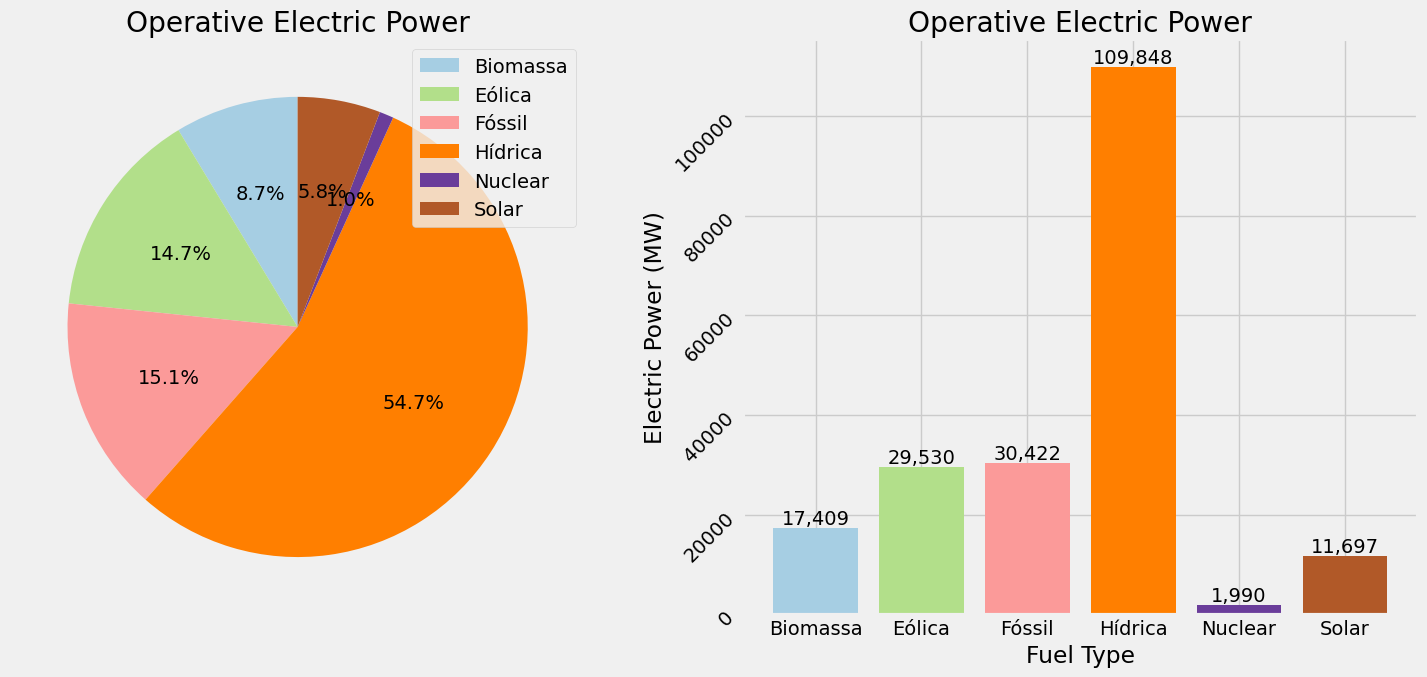

In [15]:
#bar and pie chart of Operative Electric Power by Fuel Type
#define the array for subplots
fig, ax= plt.subplots(1,2, figsize=(15,7))

#Pie Chart
wedges, texts, autotexts = ax[0].pie(
    type_fuel_op['MdaPotenciaOutorgadaKw'], 
    autopct='%1.1f%%', 
    colors=get_color(colors_type_fuel_dict, type_fuel_op['DscOrigemCombustivel']), 
    startangle=90)

ax[0].set_title('Operative Electric Power')
ax[0].legend(type_fuel_op['DscOrigemCombustivel'])

#Bar chart
fuel_type_bar = ax[1].bar(
    type_fuel_op['DscOrigemCombustivel'], 
    type_fuel_op['MdaPotenciaOutorgadaKw']/1000, 
    color=get_color(colors_type_fuel_dict, type_fuel_op['DscOrigemCombustivel']))

ax[1].ticklabel_format(axis='y', style='plain')
ax[1].set_title('Operative Electric Power')
ax[1].set_ylabel('Electric Power (MW)')
ax[1].set_xlabel('Fuel Type')
#rotate y-axis label for better readability
plt.setp(ax[1].get_yticklabels(), rotation=45, ha='right')

#add value to top of each bar
add_label_top_bar(ax[1],0)
    
#print graph
plt.tight_layout()
plt.show()


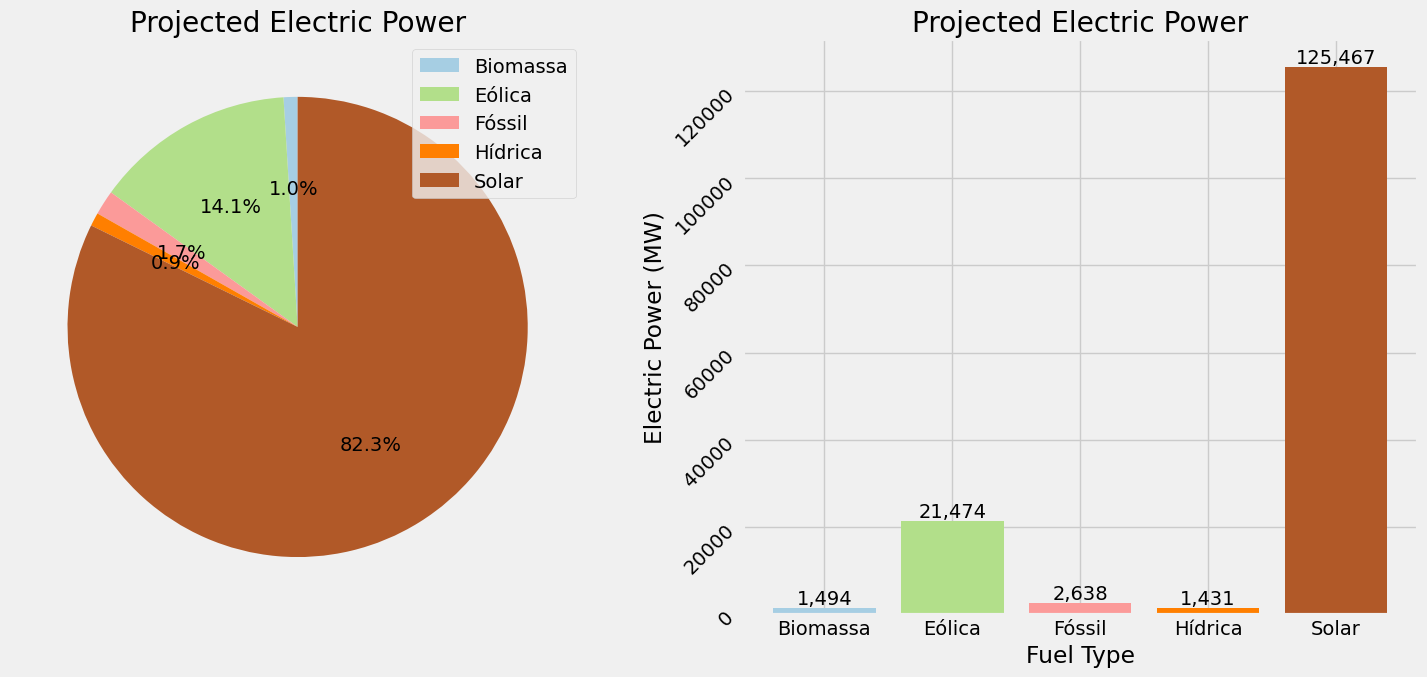

In [16]:
#bar and pie chart of Projected Electric Power by Fuel Type
#define the array for subplots
fig, ax= plt.subplots(1,2, figsize=(15,7))
#define colors for graphs
#colors= plt.cm.Set3(np.linspace(0, 1, len(type_fuel_proj['DscOrigemCombustivel'])))
#Pie Chart
wedges, texts, autotexts = ax[0].pie(type_fuel_proj['MdaPotenciaOutorgadaKw'], 
                                     autopct='%1.1f%%', 
                                     colors=get_color(colors_type_fuel_dict, type_fuel_proj['DscOrigemCombustivel']), 
                                     startangle=90)
ax[0].set_title('Projected Electric Power')
ax[0].legend(type_fuel_proj['DscOrigemCombustivel'])

#Bar chart
fuel_type_bar = ax[1].bar(
    type_fuel_proj['DscOrigemCombustivel'], 
    type_fuel_proj['MdaPotenciaOutorgadaKw']/1000, 
    color=get_color(colors_type_fuel_dict, type_fuel_proj['DscOrigemCombustivel']))

ax[1].ticklabel_format(axis='y', style='plain')
ax[1].set_title('Projected Electric Power')
ax[1].set_ylabel('Electric Power (MW)')
ax[1].set_xlabel('Fuel Type')
#rotate y-axis label for better readability
plt.setp(ax[1].get_yticklabels(), rotation=45, ha='right')

#add value to top of each bar
add_label_top_bar(ax[1],0)
    
#print graph
plt.tight_layout()
plt.show()


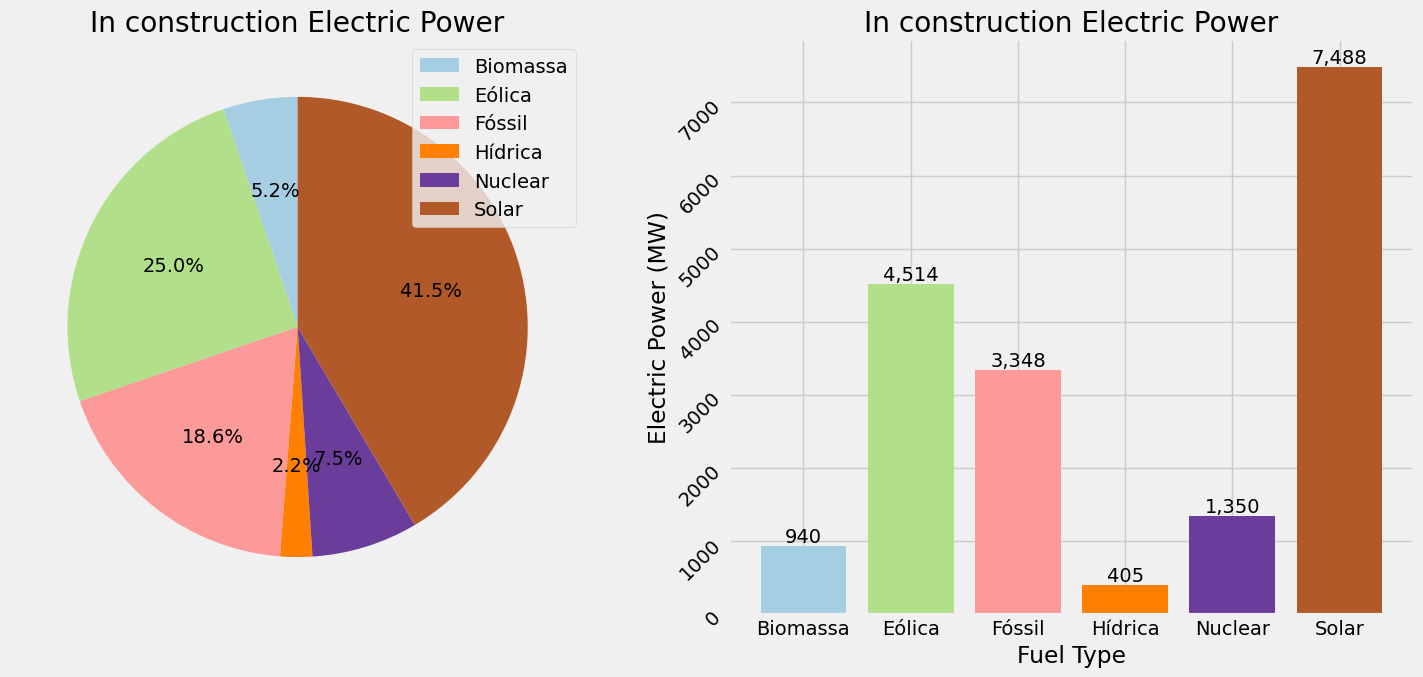

In [17]:
#bar and pie chart of Projected Electric Power by Fuel Type
#define the array for subplots
fig, ax= plt.subplots(1,2, figsize=(15,7))
#define colors for graphs
colors= plt.cm.Set3(np.linspace(0, 1, len(type_fuel_constr['DscOrigemCombustivel'])))
#Pie Chart
wedges, texts, autotexts = ax[0].pie(
    type_fuel_constr['MdaPotenciaOutorgadaKw'], 
    autopct='%1.1f%%', 
    colors=get_color(colors_type_fuel_dict, type_fuel_constr['DscOrigemCombustivel']), 
    startangle=90)

ax[0].set_title('In construction Electric Power')
ax[0].legend(type_fuel_constr['DscOrigemCombustivel'])

#Bar chart
fuel_type_bar = ax[1].bar(
    type_fuel_constr['DscOrigemCombustivel'], 
    type_fuel_constr['MdaPotenciaOutorgadaKw']/1000, 
    color=get_color(colors_type_fuel_dict, type_fuel_constr['DscOrigemCombustivel']))

ax[1].ticklabel_format(axis='y', style='plain')
ax[1].set_title('In construction Electric Power')
ax[1].set_ylabel('Electric Power (MW)')
ax[1].set_xlabel('Fuel Type')
#rotate y-axis label for better readability
plt.setp(ax[1].get_yticklabels(), rotation=45, ha='right')

#add value to top of each bar
add_label_top_bar(ax[1],0)
    
#print graph
plt.tight_layout()
plt.show()

Pie chart and bar chart of Electric Power by Generator Power Plant Type:

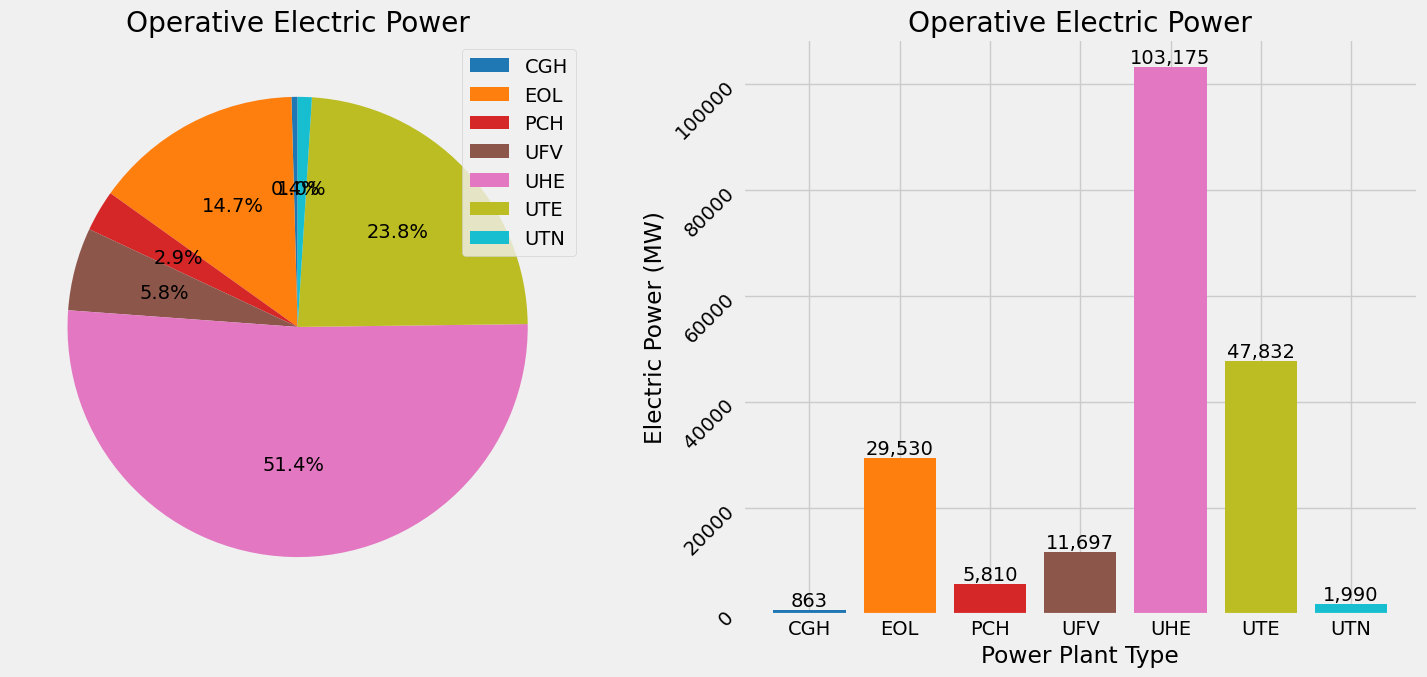

In [18]:
#bar and pie chart of Operative Electric Power by Power Plant Generator Type
#define the array for subplots
fig, ax= plt.subplots(1,2, figsize=(15,7))
#define colors for graphs
colors= plt.cm.Paired(np.linspace(0, 1, len(type_generator_op['SigTipoGeracao'])))
#Pie Chart
wedges, texts, autotexts = ax[0].pie(
    type_generator_op['MdaPotenciaOutorgadaKw'], 
    autopct='%1.1f%%', 
    colors=get_color(colors_type_generator_dict, type_generator_op['SigTipoGeracao']), 
    startangle=90)

ax[0].set_title('Operative Electric Power')
ax[0].legend(type_generator_op['SigTipoGeracao'])

#Bar chart
fuel_type_bar = ax[1].bar(
    type_generator_op['SigTipoGeracao'], 
    type_generator_op['MdaPotenciaOutorgadaKw']/1000, 
    color=get_color(colors_type_generator_dict, type_generator_op['SigTipoGeracao']))

ax[1].ticklabel_format(axis='y', style='plain')
ax[1].set_title('Operative Electric Power')
ax[1].set_ylabel('Electric Power (MW)')
ax[1].set_xlabel('Power Plant Type')
#rotate y-axis label for better readability
plt.setp(ax[1].get_yticklabels(), rotation=45, ha='right')

#add value to top of each bar
add_label_top_bar(ax[1],0)
    
#print graph
plt.tight_layout()
plt.show()

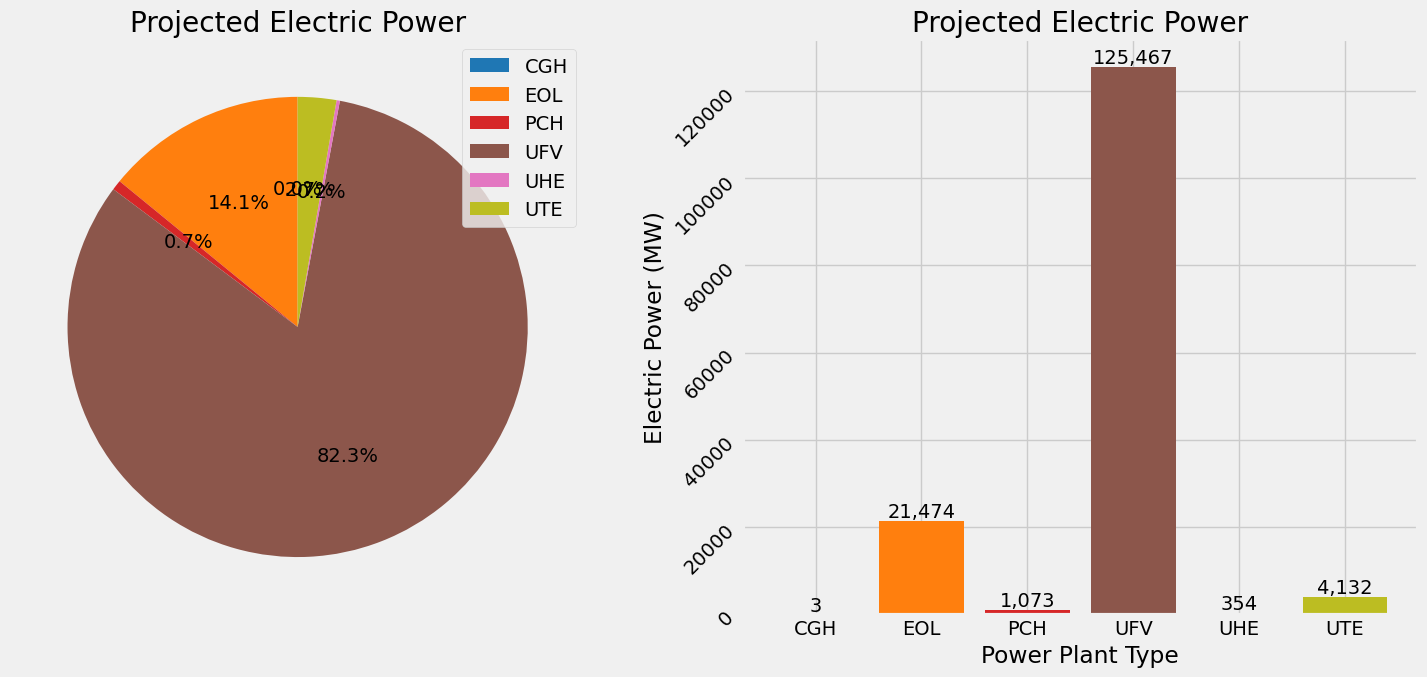

In [19]:
#bar and pie chart of Projected Electric Power by Power Plant Generator Type
#define the array for subplots
fig, ax= plt.subplots(1,2, figsize=(15,7))

#Pie Chart
wedges, texts, autotexts = ax[0].pie(
    type_generator_proj['MdaPotenciaOutorgadaKw'], 
    autopct='%1.1f%%', 
    colors=get_color(colors_type_generator_dict, type_generator_proj['SigTipoGeracao']), 
    startangle=90)

ax[0].set_title('Projected Electric Power')
ax[0].legend(type_generator_proj['SigTipoGeracao'])

#Bar chart
fuel_type_bar = ax[1].bar(
    type_generator_proj['SigTipoGeracao'], 
    type_generator_proj['MdaPotenciaOutorgadaKw']/1000, 
    color=get_color(colors_type_generator_dict, type_generator_proj['SigTipoGeracao']))

ax[1].ticklabel_format(axis='y', style='plain')
ax[1].set_title('Projected Electric Power')
ax[1].set_ylabel('Electric Power (MW)')
ax[1].set_xlabel('Power Plant Type')
#rotate y-axis label for better readability
plt.setp(ax[1].get_yticklabels(), rotation=45, ha='right')

#add value to top of each bar
add_label_top_bar(ax[1],0)
    
#print graph
plt.tight_layout()
plt.show()

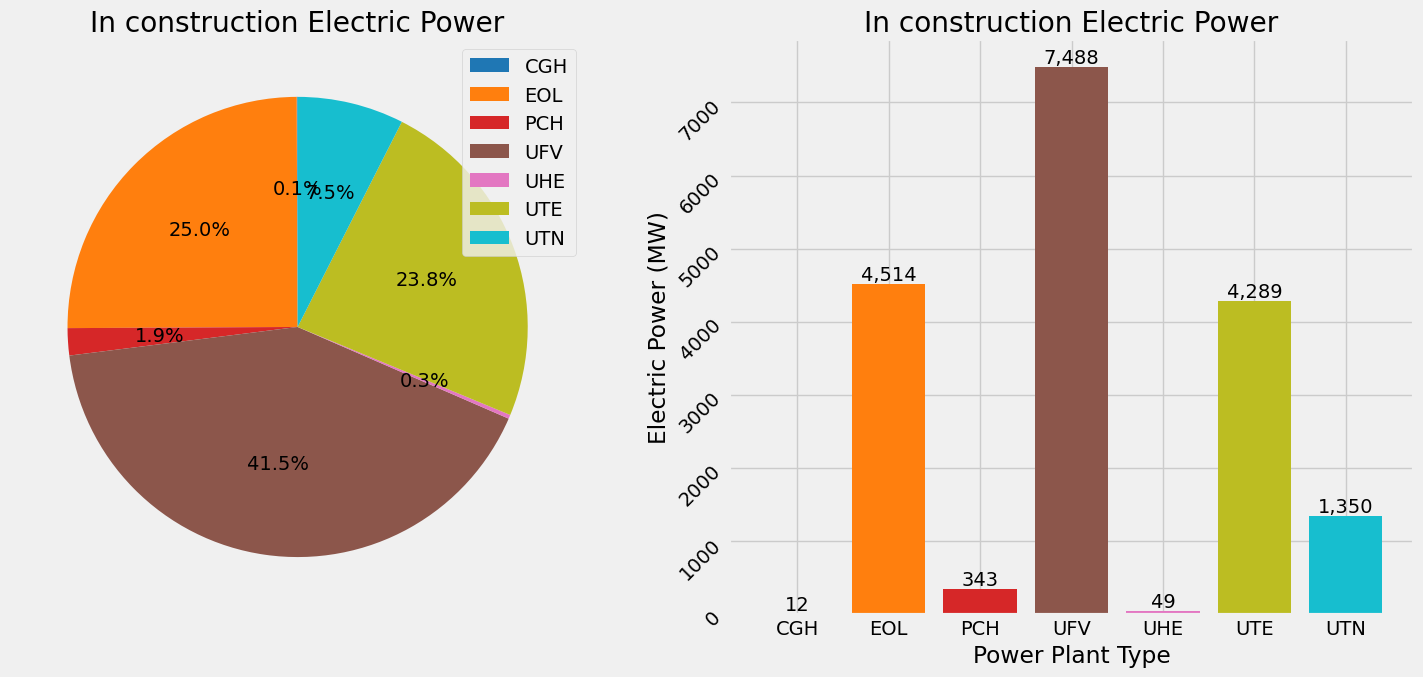

In [20]:
#bar and pie chart of In construction Electric Power by Power Plant Generator Type
#define the array for subplots
fig, ax= plt.subplots(1,2, figsize=(15,7))

#Pie Chart
wedges, texts, autotexts = ax[0].pie(
    type_generator_constr['MdaPotenciaOutorgadaKw'], 
    autopct='%1.1f%%', 
    colors=get_color(colors_type_generator_dict, type_generator_constr['SigTipoGeracao']), 
    startangle=90)

ax[0].set_title('In construction Electric Power')
ax[0].legend(type_generator_constr['SigTipoGeracao'])

#Bar chart
fuel_type_bar = ax[1].bar(
    type_generator_constr['SigTipoGeracao'], 
    type_generator_constr['MdaPotenciaOutorgadaKw']/1000, 
    color=get_color(colors_type_generator_dict, type_generator_constr['SigTipoGeracao']))

ax[1].ticklabel_format(axis='y', style='plain')
ax[1].set_title('In construction Electric Power')
ax[1].set_ylabel('Electric Power (MW)')
ax[1].set_xlabel('Power Plant Type')
#rotate y-axis label for better readability
plt.setp(ax[1].get_yticklabels(), rotation=45, ha='right')

#add value to top of each bar
add_label_top_bar(ax[1],0)
    
#print graph
plt.tight_layout()
plt.show()

Choropleth map of Electric Power generated by state:

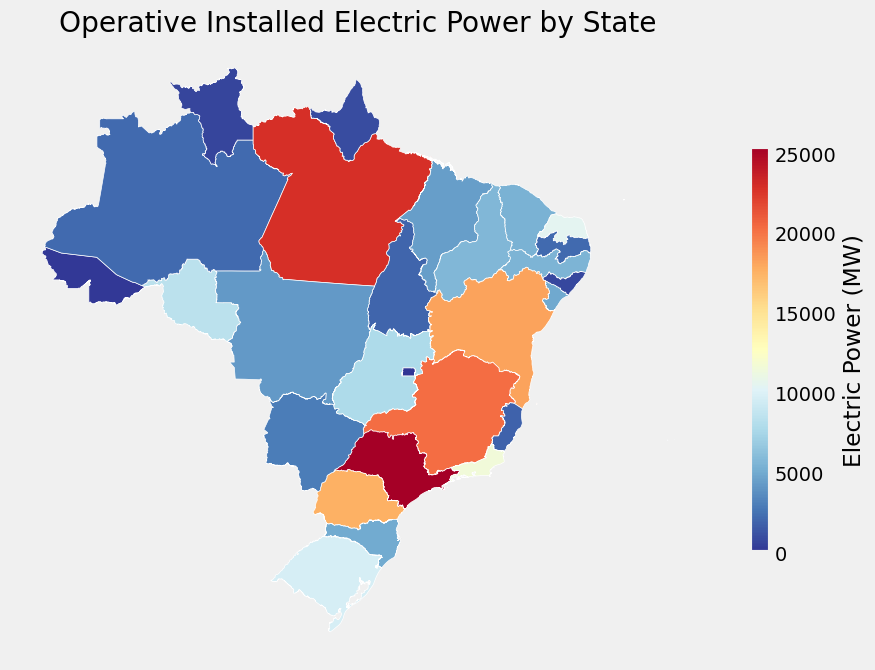

In [21]:
#choropleth map of Operative Electric Power by State
#create figures and axes for matplotlib
fig, ax = plt.subplots(figsize=(10, 10))

#plot map
states_power_op.plot(
    column=states_power_op['MdaPotenciaOutorgadaKw']/1000,
    cmap="RdYlBu_r",
    vmin = 0,
    linewidth=0.5,
    edgecolor='1',
    legend=True,
    legend_kwds={
        "label": "Electric Power (MW)",
        "orientation": "vertical",
        "shrink": 0.5,},
    missing_kwds={
            "color": "lightgrey",
            "label": "Missing values",},
    ax=ax,
)
#set title
ax.set_title("Operative Installed Electric Power by State")
ax.axis("off")
plt.show()

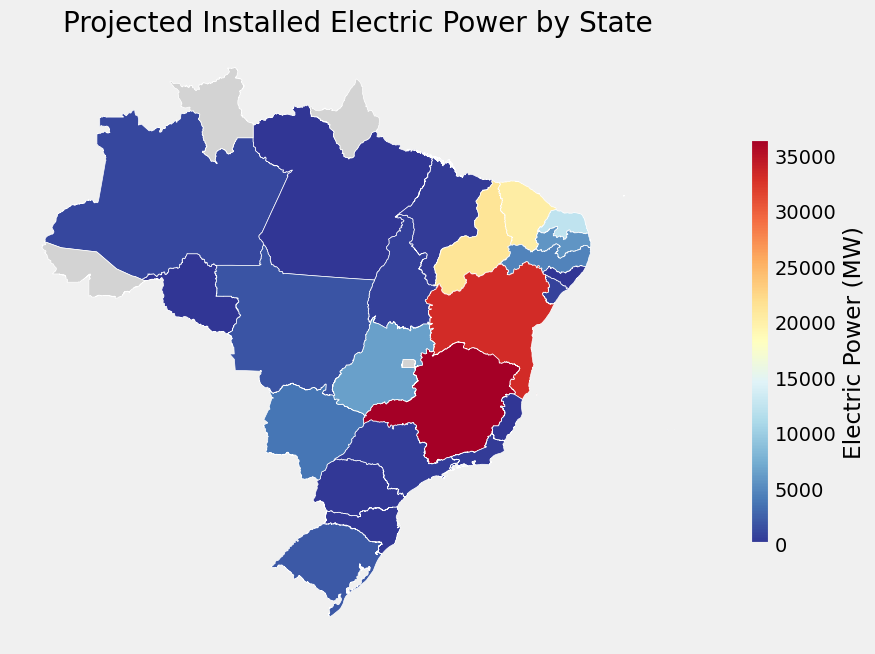

In [22]:
#choropleth map of Projected Electric Power by State
#create figures and axes for matplotlib
fig, ax = plt.subplots(figsize=(10, 10))
#plot map
states_power_proj.plot(
    column=states_power_proj['MdaPotenciaOutorgadaKw']/1000,
    cmap="RdYlBu_r",
    vmin = 0,
    linewidth=0.5,
    edgecolor='1',
    legend=True,
    legend_kwds={
        "label": "Electric Power (MW)",
        "orientation": "vertical",
        "shrink": 0.5,},
    missing_kwds={
            "color": "lightgrey",
            "label": "Missing values",},
    ax=ax,
)
#set title
ax.set_title("Projected Installed Electric Power by State")
ax.axis("off")
plt.show()

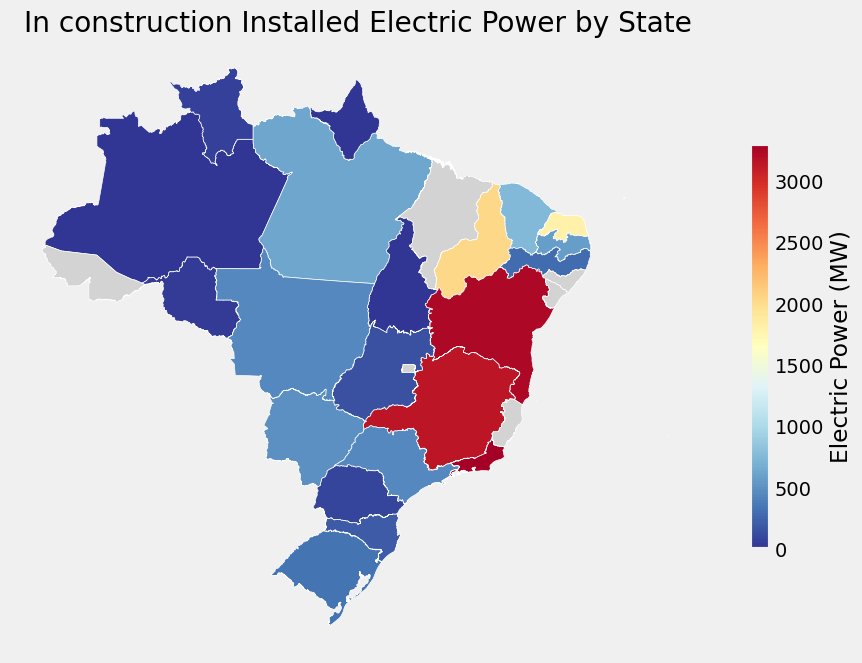

In [23]:
#choropleth map of In construction Electric Power by State
#create figures and axes for matplotlib
fig, ax = plt.subplots(figsize=(10, 10))
#plot map
states_power_constr.plot(
    column=states_power_constr['MdaPotenciaOutorgadaKw']/1000,
    cmap="RdYlBu_r",
    linewidth=0.5,
    edgecolor='1',
    vmin = 0,
    legend=True,
    legend_kwds={
        "label": "Electric Power (MW)",
        "orientation": "vertical",
        "shrink": 0.5,},
    missing_kwds={
            "color": "lightgrey",
            "label": "Missing values",},
    ax=ax,
)
#set title
ax.set_title("In construction Installed Electric Power by State")
ax.axis("off")
plt.show()

Historical line graph of evolution of installed electric power capacity in brazil:

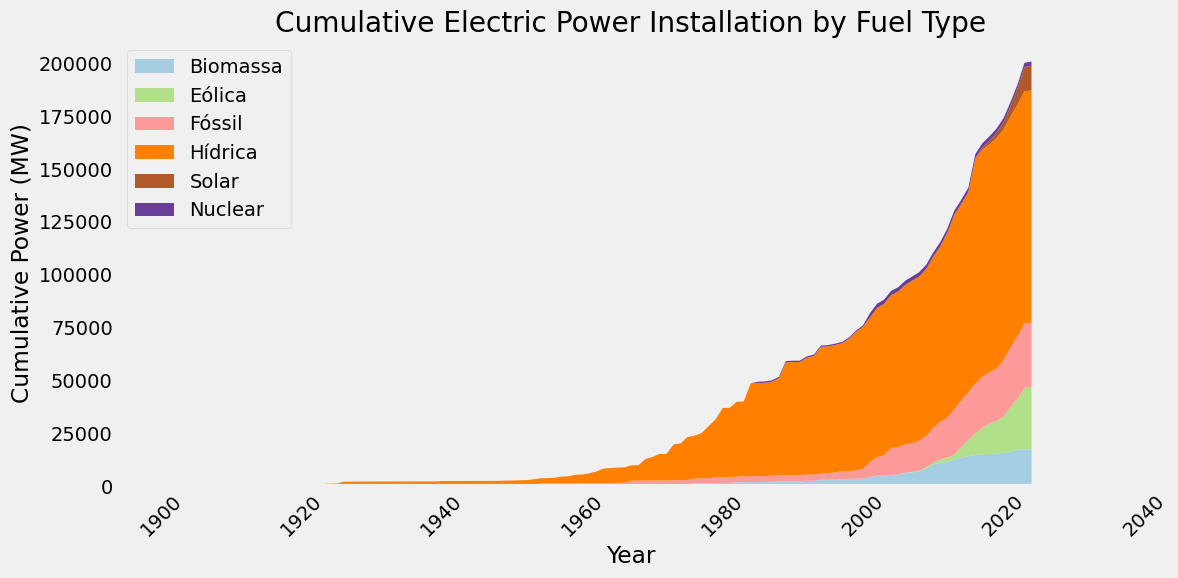

In [24]:
#create dataframe for graph of historical acumulative
historical_electric_power = df_data[['DatEntradaOperacao', 'MdaPotenciaOutorgadaKw', 'NomEmpreendimento', 'DscOrigemCombustivel', 'SigTipoGeracao', 'DscFaseUsina']]
#get the year of the datetime column to do a groupby
historical_electric_power = historical_electric_power.sort_values('DatEntradaOperacao')
historical_electric_power['Year'] = historical_electric_power['DatEntradaOperacao'].dt.year

#historical acumulated values by fuel type
historical_electric_power_type_fuel = historical_electric_power[historical_electric_power['DscFaseUsina']=='Operação'].groupby(['Year', 'DscOrigemCombustivel']).agg({'MdaPotenciaOutorgadaKw':'sum'}).reset_index()
historical_electric_power_type_fuel['MdaPotenciaOutorgadaKw'] = historical_electric_power_type_fuel['MdaPotenciaOutorgadaKw']/1000

# List of fuel types
fuel_types = historical_electric_power_type_fuel['DscOrigemCombustivel'].unique()

# Pivot the dataframe to have years as index and fuel types as columns
df_pivot = historical_electric_power_type_fuel.pivot(index='Year', columns='DscOrigemCombustivel', values='MdaPotenciaOutorgadaKw')

# Fill NaN values with 0 (for years where no power was added for a fuel type)
df_pivot = df_pivot.fillna(0)

# Ensure all fuel types are present, add missing ones with 0 if necessary
for fuel in fuel_types:
    if fuel not in df_pivot.columns:
        df_pivot[fuel] = 0

# Calculate cumulative sum for each fuel type
df_cumsum = df_pivot.cumsum()

# Create the stacked area chart
fig, ax = plt.subplots(figsize=(12, 6))

# Define a color palette
#colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Plot stacked area chart
ax.stackplot(df_cumsum.index, 
             [df_cumsum[fuel] for fuel in fuel_types],
             labels=fuel_types,
             colors=get_color(colors_type_fuel_dict, fuel_types))

# Customize the chart
ax.set_title('Cumulative Electric Power Installation by Fuel Type')
ax.set_xlabel('Year')
ax.set_ylabel('Cumulative Power (MW)')
ax.legend(loc='upper left')

# Set x-axis ticks to show every 20 years
ax.set_xticks(range(1900, 2041, 20))
ax.set_xticklabels(range(1900, 2041, 20), rotation=45)

# Add grid lines
ax.grid(False)

# Tight layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()

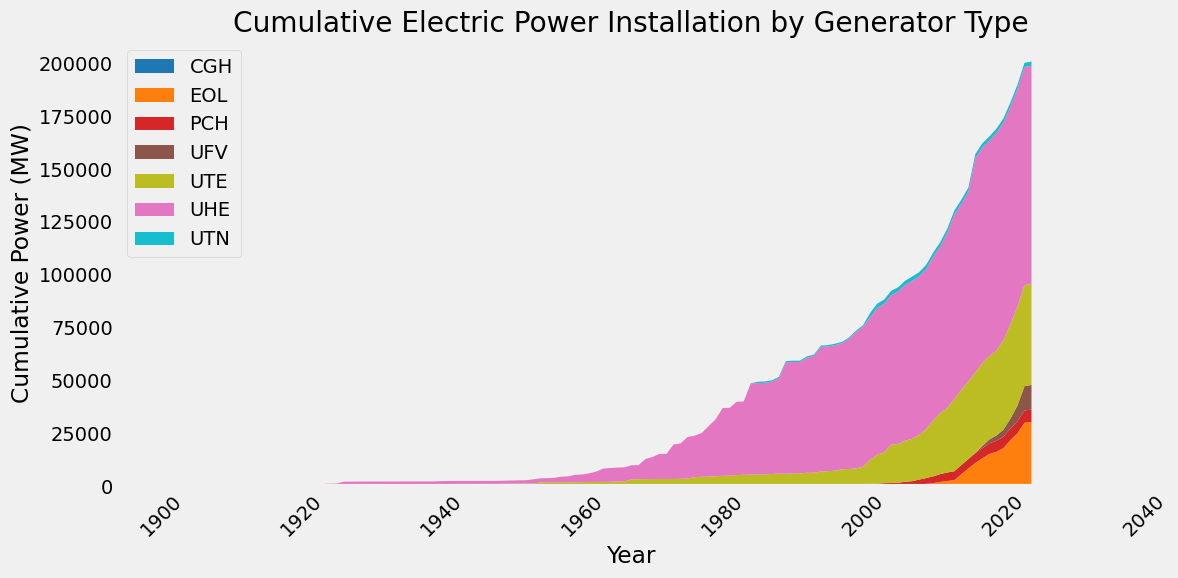

In [25]:
#historical acumulated values by generator type
historical_electric_power_type_generator = historical_electric_power[historical_electric_power['DscFaseUsina']=='Operação'].groupby(['Year', 'SigTipoGeracao']).agg({'MdaPotenciaOutorgadaKw':'sum'}).reset_index()
historical_electric_power_type_generator['MdaPotenciaOutorgadaKw'] = historical_electric_power_type_generator['MdaPotenciaOutorgadaKw']/1000

# List of generator types
generator_types = historical_electric_power_type_generator['SigTipoGeracao'].unique()

# Pivot the dataframe to have years as index and generator types as columns
df_pivot_generator = historical_electric_power_type_generator.pivot(index='Year', columns='SigTipoGeracao', values='MdaPotenciaOutorgadaKw')

# Fill NaN values with 0 (for years where no power was added for a generator type)
df_pivot_generator = df_pivot_generator.fillna(0)

# Ensure all generator types are present, add missing ones with 0 if necessary
for generator in generator_types:
    if generator not in df_pivot_generator.columns:
        df_pivot_generator[generator] = 0

# Calculate cumulative sum for each generator type
df_cumsum_generator = df_pivot_generator.cumsum()

# Create the stacked area chart
fig, ax = plt.subplots(figsize=(12, 6))

# Define a color palette
#colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Plot stacked area chart
ax.stackplot(df_cumsum_generator.index, 
             [df_cumsum_generator[generator] for generator in generator_types],
             labels=generator_types,
             colors=get_color(colors_type_generator_dict, generator_types))

# Customize the chart
ax.set_title('Cumulative Electric Power Installation by Generator Type')
ax.set_xlabel('Year')
ax.set_ylabel('Cumulative Power (MW)')
ax.legend(loc='upper left')

# Set x-axis ticks to show every 20 years
ax.set_xticks(range(1900, 2041, 20))
ax.set_xticklabels(range(1900, 2041, 20), rotation=45)

# Add grid lines
ax.grid(False)

# Tight layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()

In [4]:
import plotly.express as px
px.colors.named_colorscales()

['aggrnyl',
 'agsunset',
 'blackbody',
 'bluered',
 'blues',
 'blugrn',
 'bluyl',
 'brwnyl',
 'bugn',
 'bupu',
 'burg',
 'burgyl',
 'cividis',
 'darkmint',
 'electric',
 'emrld',
 'gnbu',
 'greens',
 'greys',
 'hot',
 'inferno',
 'jet',
 'magenta',
 'magma',
 'mint',
 'orrd',
 'oranges',
 'oryel',
 'peach',
 'pinkyl',
 'plasma',
 'plotly3',
 'pubu',
 'pubugn',
 'purd',
 'purp',
 'purples',
 'purpor',
 'rainbow',
 'rdbu',
 'rdpu',
 'redor',
 'reds',
 'sunset',
 'sunsetdark',
 'teal',
 'tealgrn',
 'turbo',
 'viridis',
 'ylgn',
 'ylgnbu',
 'ylorbr',
 'ylorrd',
 'algae',
 'amp',
 'deep',
 'dense',
 'gray',
 'haline',
 'ice',
 'matter',
 'solar',
 'speed',
 'tempo',
 'thermal',
 'turbid',
 'armyrose',
 'brbg',
 'earth',
 'fall',
 'geyser',
 'prgn',
 'piyg',
 'picnic',
 'portland',
 'puor',
 'rdgy',
 'rdylbu',
 'rdylgn',
 'spectral',
 'tealrose',
 'temps',
 'tropic',
 'balance',
 'curl',
 'delta',
 'oxy',
 'edge',
 'hsv',
 'icefire',
 'phase',
 'twilight',
 'mrybm',
 'mygbm']